In [19]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model



from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

2023-04-04 12:11:26.135690: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-04 12:11:26.493466: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-04 12:11:26.496233: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 12:11:28.650083: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
algorithm_names=['DE','ES','PSO']
seeds=[200,400,600,800,1000]
dimension=5

In [4]:
from utils import *
all_configuration_trajectories=read_trajectory_data(algorithm_names, seeds, dimension)

(6000000, 10)


/home/jovyan/work/utils.py:164: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df = sample_df.append(sample_df_1)


(6000000, 10)


/home/jovyan/work/utils.py:164: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df = sample_df.append(sample_df_1)


(6000000, 10)


/home/jovyan/work/utils.py:164: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df = sample_df.append(sample_df_1)


(6000000, 10)


/home/jovyan/work/utils.py:164: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df = sample_df.append(sample_df_1)


(6000000, 10)


/home/jovyan/work/utils.py:164: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df = sample_df.append(sample_df_1)


(6000000, 10)


/home/jovyan/work/utils.py:164: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df = sample_df.append(sample_df_1)


(6000000, 10)


/home/jovyan/work/utils.py:164: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df = sample_df.append(sample_df_1)


(6000000, 10)


/home/jovyan/work/utils.py:164: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df = sample_df.append(sample_df_1)


(6000000, 10)


/home/jovyan/work/utils.py:164: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df = sample_df.append(sample_df_1)


(6000000, 10)


/home/jovyan/work/utils.py:164: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df = sample_df.append(sample_df_1)


(6000000, 10)


/home/jovyan/work/utils.py:164: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df = sample_df.append(sample_df_1)


(6000000, 10)


/home/jovyan/work/utils.py:164: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df = sample_df.append(sample_df_1)


(6000000, 10)


/home/jovyan/work/utils.py:164: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df = sample_df.append(sample_df_1)


(6000000, 10)


/home/jovyan/work/utils.py:164: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df = sample_df.append(sample_df_1)


(6000000, 10)


/home/jovyan/work/utils.py:164: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df = sample_df.append(sample_df_1)


In [8]:
all_configuration_trajectories=all_configuration_trajectories.rename(columns={'algorithm_name':'conf','problem_id':'problem','instance_id':'instance', 'seed':'run'})

In [12]:
all_configuration_trajectories

x_0       x_1       x_2       x_3  \
conf problem instance run  iteration                                           
DE   1       1        200  0          4.476323 -2.734526  0.944201 -0.716913   
                           0         -4.971394 -1.425763  4.096949 -0.439190   
                           0          3.673570  4.860275  4.232667 -1.963067   
                           0         -3.787780  2.855763 -2.494949 -4.039703   
                           0          3.260501  0.183251  3.735004  0.783757   
...                                        ...       ...       ...       ...   
PSO  24      100      1000 49        -1.719751  1.618423  1.429417 -1.196183   
                           49        -1.393425  2.611246  1.574812 -2.108312   
                           49        -2.745416  1.513312  1.749256 -0.953234   
                           49        -2.635253  1.297459  1.438285 -2.337344   
                           49        -2.951253  2.747349  1.751861 -1.593063   

                                           x_4  current f(x)  
conf problem instance run  iteration                          
DE   1       1        200  0          2.641407    137.903248  
                           0          4.818027    191.914517  
                           0          3.461035    204.805497  
                           0          4.434910    201.270930  
                           0         -0.499155    116.269933  
...                                        ...           ...  
PSO  24      100      1000 49         0.514956   -554.732293  
                           49         0.601676   -549.715122  
                           49         1.883558   -556.507388  
                           49         1.104237   -557.280663  
                           49         1.934023   -546.575500  

[90000000 rows x 6 columns]

In [10]:
all_configuration_trajectories=all_configuration_trajectories.set_index(['conf','problem','instance','run','iteration'])

In [26]:
all_configuration_trajectories.columns=[f'x{i}' for i in range (0,dimension)] + ["current f(x)"]

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
def get_x_y(df):
    x_current=[]
    x_next=[]
    y=[]
    for conf_id in df.reset_index()['conf'].drop_duplicates().values:
        conf_trajectories=df.loc[conf_id]

        for problem in df.reset_index()['problem'].drop_duplicates().values:
            problem_df=conf_trajectories.loc[problem]
            for instance in df.reset_index()['instance'].drop_duplicates().values:
                instance_df=problem_df.loc[instance]
                for run in df.reset_index()['run'].drop_duplicates().values:
                    trajectory=instance_df.loc[run]
                    for it in range (0,10):
                        scaler = MinMaxScaler(feature_range=(0,1))
                        trajectory_it_2=trajectory.query("iteration==@it or iteration==@it+1")
                        trajectory_it_2["current f(x)"]=scaler.fit_transform(trajectory_it_2["current f(x)"].values.reshape(-1, 1))
                        current_population=trajectory_it_2.query("iteration==@it")[["x0","x1","x2","x3","x4","current f(x)"]].sort_values("current f(x)")
                        next_population=trajectory_it_2.query("iteration==@it+1")[["x0","x1","x2","x3","x4","current f(x)"]].sort_values("current f(x)")
                        x_current+=[current_population]
                        x_next+=[next_population]
                        y+=[conf_id]
    return tf.convert_to_tensor(np.array(x_current)), tf.convert_to_tensor(np.array(x_next)), y
            


In [20]:
instance_ids = list(all_configuration_trajectories.index.get_level_values('problem').drop_duplicates().values)
train_instance_ids, test_instance_ids = train_test_split(instance_ids, test_size=0.1)
train_instance_ids, val_instance_ids = train_test_split(train_instance_ids, test_size=0.1)

In [21]:
all_configurations=all_configuration_trajectories.reset_index()['conf'].drop_duplicates().values

In [29]:
class AutoencoderConv(Model):
  def __init__(self):
    super(AutoencoderConv, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(50,6, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=1),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=1)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=1, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=1, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [30]:
class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
      layers.Dense(latent_dim, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([
        layers.Dense(latent_dim, activation='relu'),
      layers.Dense(300, activation='sigmoid'),
      layers.Reshape((50,6))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
    

In [31]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [61]:
trained_models={}
use_conv=True
for conf in all_configurations:
    conf_trajectories=all_configuration_trajectories.query("conf==@conf and instance<=10")
    train, val, test =[conf_trajectories.query(f"problem in @split_instance_ids").sample(frac=1) for split_instance_ids in [train_instance_ids, val_instance_ids, test_instance_ids]]
    
    x_train_0,x_train_1, y_train=get_x_y(train)
    x_val_0,x_val_1, y_val=get_x_y(val)
    x_test_0,x_test_1, y_test=get_x_y(test)

    latent_dim = 64 
    autoencoder = AutoencoderConv() if use_conv else Autoencoder(latent_dim)
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, min_delta=0.01)
    autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
    autoencoder.fit(x_train_0, x_train_1,
                epochs=20,
                shuffle=True, callbacks=[callback],
                validation_data=(x_val_0, x_val_1))
    trained_models[conf]={'model':autoencoder, 'train':train, 'val':val, 'test':test, 'data':(x_train_0,x_train_1, y_train,x_val_0,x_val_1, y_val, x_test_0,x_test_1, y_test) }

Epoch 1/20
282/282 [==============================] - 7s 23ms/step - loss: 5.9765 - val_loss: 5.2637
Epoch 2/20
282/282 [==============================] - 6s 22ms/step - loss: 5.8622 - val_loss: 5.2502
Epoch 3/20
282/282 [==============================] - 6s 22ms/step - loss: 5.8555 - val_loss: 5.2465
Epoch 4/20
282/282 [==============================] - 6s 22ms/step - loss: 5.8528 - val_loss: 5.2443
Epoch 1/20
282/282 [==============================] - 8s 24ms/step - loss: 4.8189 - val_loss: 4.3599
Epoch 2/20
282/282 [==============================] - 6s 23ms/step - loss: 4.7341 - val_loss: 4.3407
Epoch 3/20
282/282 [==============================] - 6s 23ms/step - loss: 4.7274 - val_loss: 4.3393
Epoch 4/20
282/282 [==============================] - 6s 22ms/step - loss: 4.7237 - val_loss: 4.3397
Epoch 1/20
282/282 [==============================] - 8s 23ms/step - loss: 3.5160 - val_loss: 2.9463
Epoch 2/20
282/282 [==============================] - 6s 23ms/step - loss: 3.4303 - val_los

In [62]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [65]:
all_similarities=pd.DataFrame()
for conf in all_configurations:
    
    x_train_0,x_train_1, y_train,x_val_0,x_val_1, y_val, x_test_0,x_test_1, y_test=trained_models[conf]['data']
    predictions_for_conf=[]
    
    for x0,x1 in zip(x_test_0,x_test_1):
        test_predictions=[]
        for conf2 in all_configurations:
            pred=trained_models[conf2]['model'](tf.convert_to_tensor(np.array([x0]))).numpy()[0]
            pred=pred.reshape(50,6)
            test_predictions+=[mean_absolute_error(pred,x1)]
        predictions_for_conf+=[test_predictions]
    d=pd.DataFrame(predictions_for_conf)
    d['source_conf']=conf
    all_similarities=pd.concat([all_similarities, d])

In [66]:
all_similarities

,0,1,2,source_conf
0,2.140924,2.171997,2.148512,DE
1,2.198046,2.233440,2.220127,DE
2,2.289159,2.341679,2.309247,DE
3,2.116464,2.151275,2.132674,DE
4,2.042922,2.089804,2.053641,DE
...,...,...,...,...
1495,1.879042,1.888815,1.861586,PSO
1496,1.864917,1.896168,1.865407,PSO
1497,1.862935,1.870618,1.847461,PSO
1498,1.840223,1.870376,1.853058,PSO


In [67]:
all_similarities.groupby('source_conf').mean()

,0,1,2
source_conf,,,
DE,2.013476,2.031294,2.022425
ES,1.838053,1.837849,1.848499
PSO,1.474004,1.491529,1.476653


In [68]:
import seaborn as sns

<AxesSubplot: ylabel='source_conf'>

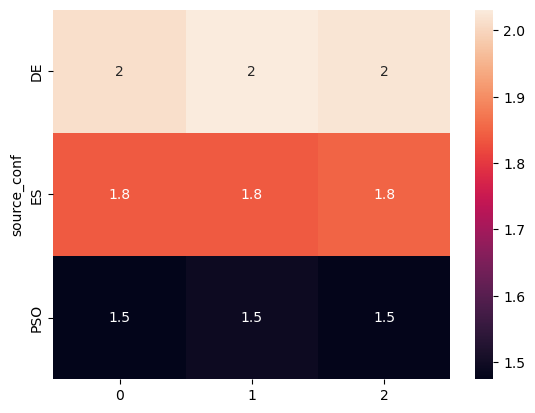

In [69]:
sns.heatmap(all_similarities.groupby('source_conf').mean(), annot=True)